# Stellar Interpretation for Meteoritic data and PLotting (for Everyone) - SIMPLE (Mattias Version)

In [2]:
import simple
import os, logging

logging.basicConfig(level=logging.INFO)

delete_existing = False
defaults = simple.load_defaults('test.yaml')

if os.path.exists(defaults['load_models']['filename']) and delete_existing:
    os.remove(defaults['load_models']['filename'])

models = simple.load_models(**defaults['load_models'])

INFO:SIMPLE.database:Loading file: test.hdf5
INFO:SIMPLE.database:Loading model: Ri18_m15 (CCSNe)
INFO:SIMPLE.database:Loading model: iniab2.0E-02GN93 (IsoRef)
INFO:SIMPLE.database:Loading model: W17 (IsoRef)
INFO:SIMPLE.database:Loading model: Ri18_m20 (CCSNe)
INFO:SIMPLE.database:Loading model: Ri18_m25 (CCSNe)
INFO:SIMPLE.database:Loading model: Pi16_m15 (CCSNe)
INFO:SIMPLE.database:Loading model: iniab2.0E-02GN93_Lo03 (IsoRef)
INFO:SIMPLE.database:Loading model: Pi16_m20 (CCSNe)
INFO:SIMPLE.database:Loading model: Pi16_m25 (CCSNe)
INFO:SIMPLE.database:Loading model: La22_m15 (CCSNe)
INFO:SIMPLE.database:Loading model: La22_m20 (CCSNe)
INFO:SIMPLE.database:Loading model: La22_m25 (CCSNe)
INFO:SIMPLE.database:Loading model: Si18_m15 (CCSNe)
INFO:SIMPLE.database:Loading model: iniab1.3E-02Lo03_Lo03_merged (IsoRef)
INFO:SIMPLE.database:Loading model: Si18_m20 (CCSNe)
INFO:SIMPLE.database:Loading model: Si18_m25 (CCSNe)
INFO:SIMPLE.database:Loading model: Ra02_m15 (CCSNe)
INFO:SIMPLE.da

---
This does the internal normalisation and solar - 1 normalisation.
These are avaliable through the ``intnorm`` and ``simplenorm`` attributes on each model after this. Each of these attributes is a dict containing the result of the calculations. 

For internally normalised the main result is called ``eRi`` which is contains the internally normalised data. Note that unlike this result has not been divided by one of the ratios to create slopes. To get a slope you have to do that manually (See example below). This way we can use whatever slope we want without rerunning the calculation and we have the direction as well. 

For the solar - 1 normalisation the main result is called ``Ri``.

In [3]:
models.internal_normalisation(**defaults['internal_normalisation'], min_dilution_factor=0.1)
models.simple_normalisation(**defaults['simple_normalisation'])

INFO:SIMPLE.norm:Internally normalising 3676 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 4094 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 3976 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 732 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 678 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 736 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 949 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 1298 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 1385 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 365 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 486 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 473 rows using the largest offset method.
INFO:SIMPLE

---
# Plotting

Plot-a-doodle-doo

In [6]:
import matplotlib.pyplot as plt
import numpy as np

colours=simple.ccsne.colours
linestyles = simple.ccsne.linestyles
markers = simple.ccsne.markers

This looks pretty much the same as the one from Gabors notebook.
The X values are lower because the values have been divided by the mass here and not in gabors notebook.
Also seems I have not cut off the lower masscoordinates in the Ritter model

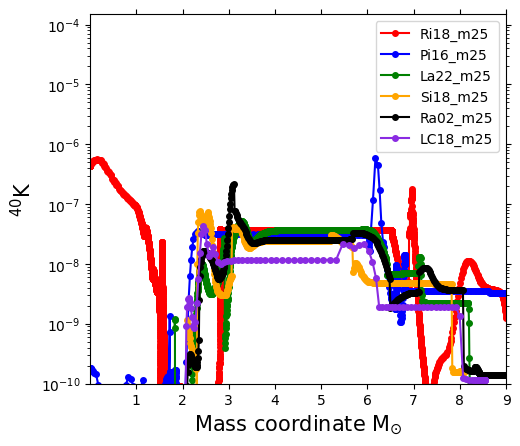

In [7]:
ifig=24
plt.figure(ifig).clear(); plt.figure(ifig)

iso = simple.asisotope('K-40')

masscut = []
for i, model in enumerate(models.where('.mass==25')):
    plt.semilogy(model.masscoord, model.abundance[iso],
                 color=colours[i], marker=markers[0], markersize=4,ls=linestyles[0],
                 label=f'{model.name}')
    masscut.append(np.min(model.masscoord))
plt.legend(loc='upper right')

plt.xlim(np.min(masscut),9)
plt.ylim(1e-10,1.5e-4)
plt.xlabel('Mass coordinate M$_{\odot}$', fontsize=15)
plt.ylabel(iso.latex(),fontsize=15)
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.gcf().subplots_adjust(left=0.25)    

plt.show()

(-10.0, 15.0)

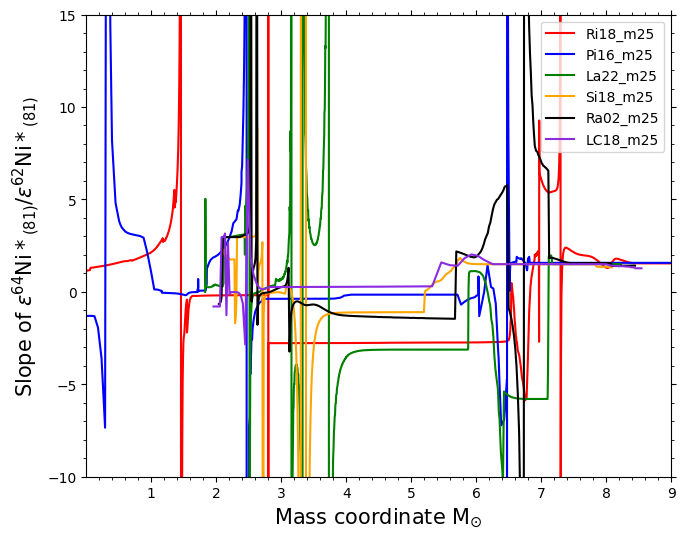

In [8]:
# I put the plotting fucntion within the ccsne namespace since they are specific to these models types.

simple.ccsne.plot_slopes(models, 'Ni-64*/Ni-62*', where='.mass==25')
plt.ylim(-10,15)

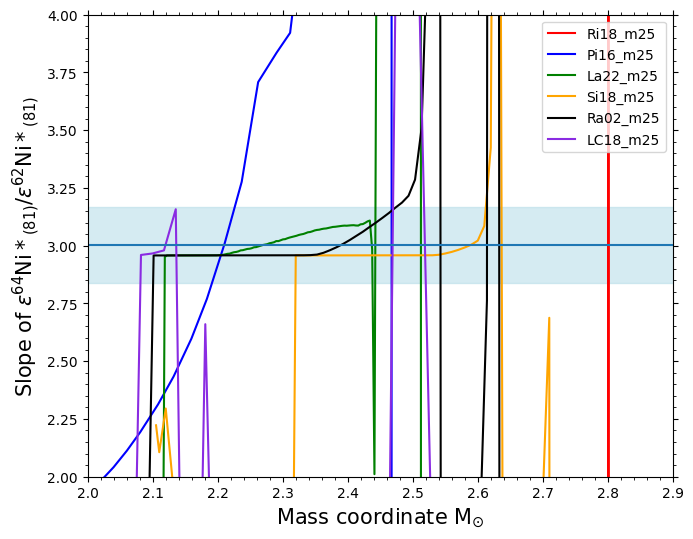

In [9]:
simple.ccsne.plot_slopes(models, 'Ni-64*/Ni-62*', where='.mass==25')
plt.ylim(-10,15)

plt.xlim(2,2.9)
plt.ylim(2,4)
plt.hlines(3.003,0,10)
x = np.linspace(0, 10, 100)
plt.fill_between(x, 3.003-0.166, 3.003+0.166, color='lightblue', alpha=0.5)

(-15.0, 25.0)

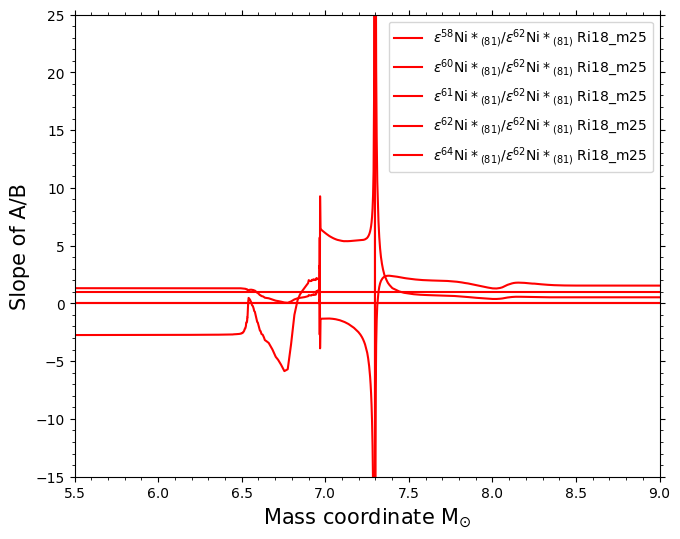

In [10]:
simple.ccsne.plot_slopes(models, **defaults['plot_slopes_example'])
plt.xlim(5.5,9)
plt.ylim(-15,25)

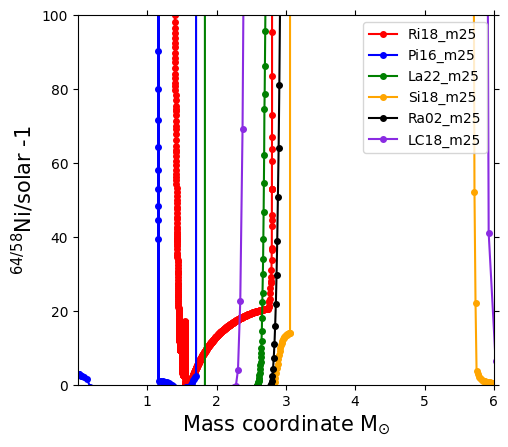

In [11]:
# plot solar ratio - 1 for selected isotopes, for different models
ifig=26
plt.figure(ifig).clear(); plt.figure(ifig)

iso = simple.asisotope('Ni-64*')

masscut = []
for i, model in enumerate(models.where('.mass==25')):
    plt.plot(model.masscoord, model.simplenorm['Ri'][iso],
                 color=colours[i], marker=markers[0], markersize=4,ls=linestyles[0],
                 label=f'{model.name}')
    masscut.append(np.min(model.masscoord))
plt.legend(loc='upper right')

plt.xlim(np.min(masscut),6)
plt.ylim(0,100)
plt.xlabel('Mass coordinate M$_{\odot}$', fontsize=15)
plt.ylabel(f'{models[0].simplenorm["label_latex"][iso]}/solar -1',fontsize=15)
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.gcf().subplots_adjust(left=0.25)    

plt.show()